In [ ]:
#To explore and implement PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2],
    [0.2, 1.5, 3.4]
])

In [ ]:
new_row = [2.1, 2.3, 1.9]
df = pd.DataFrame(data, columns=["X","Y","Z"])
df.loc[len(df)] = new_row

In [ ]:
new_row

[2.1, 2.3, 1.9]

In [ ]:
df = pd.DataFrame(data, columns=["X","Y","Z"])


In [ ]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
#Step 2: Standardization using pandas (avoids NaN issues)
standardized_data = (df - df.mean())/df.std()

In [ ]:
#Step 3:
cov_matrix = np.cov(standardized_data.T)

In [ ]:
#Step 4: Eigen Decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
#Step 5: Sort eigenvalues and eigen vectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [ ]:
#Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

In [ ]:
#Step 7: Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [ ]:
#Step 8: Output the reduced data
print("\nReduced Data (after PCA):\n", reduced_df)



Reduced Data (after PCA):
          PC1       PC2
0  -1.068284 -0.378749
1   2.153803 -0.321170
2  -1.358105 -0.022682
3  -0.430149 -0.186061
4  -2.191765 -0.162725
5  -1.289127  0.026480
6   0.090138 -0.444655
7   1.412653 -0.462064
8   0.482091 -0.298870
9   1.583743 -0.715767
10  0.615002  2.966263


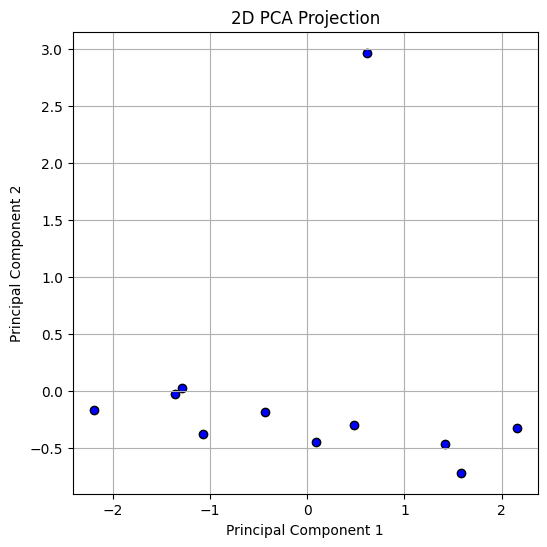

In [ ]:
#Step 9: Visualize
plt.figure(figsize=(6,6))
plt.scatter(reduced_df['PC1'],
reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()